<a href="https://colab.research.google.com/github/DrBharathiTC/Yesbankstockpriceprediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank Stock Closing Price Prediction**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

In [2]:
# Importing Required Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Importing and Loading data

In [3]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# using pandas library and 'read_csv' function to read YesBank_StockPrices csv file
YBCPP=pd.read_csv("/content/drive/My Drive/almabetter projects/YesBankStockPricePrediction/data_YesBank_StockPrices.csv")

# Data Exploration

In [10]:
#number of rows and columns 
YBCPP.shape

(185, 5)

This Dataset has 185 observations in it with 5 columns(features)

In [11]:
YBCPP.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [12]:
# Here showing in Dataset the First Five rows by using head() method 
YBCPP.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [13]:
# Here showing in Dataset the Last Five rows by using tail() method
YBCPP.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [14]:
#information of the dataset 
YBCPP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


There are multiple variable in the dataset - Date, Open, High and close The columns Open and Close represent the starting and final price.
The High, Low variable are represent the maximum and minimum.

In [15]:
#description of the data in the dataset
YBCPP.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


Data Wrangling
Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.

Objectives:
Handle missing values
Correct data format
Standardize and normalize data

In [16]:
#Looking for missing values
YBCPP.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

No missing values in dataset. Here our dataset in no nan values

In [17]:
#Looking for duplicates in dataset
len(YBCPP[YBCPP.duplicated()])

0

Do not have any duplicates in dataset

Correct data format
We are almost there!
The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In Pandas, we use:

.dtype() to check the data type

.astype() to change the data type

In [18]:
YBCPP.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [19]:
YBCPP['Date'].head()

0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
Name: Date, dtype: object

The Given Date in data is format of Month-YY. We need to convert in proper date format of YYYY-MM-DD.
Since, Date column has dtype as object we've to convert it into datetime format

In [20]:
# converting 'Date' into datetime - YYYY-MM-DD
# required the changing data type of date 
 
from datetime import datetime
YBCPP['Date'] = YBCPP['Date'].apply(lambda x : datetime.strptime(x, '%b-%y'))

In [21]:
#check dtype of date now
YBCPP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


Now Format and data type of date feature has changed into datetime.

# Checking the Outlier
[ ]


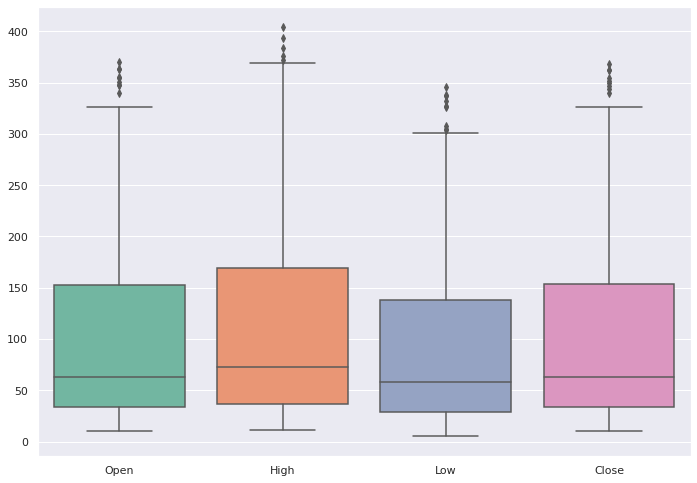

In [22]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=YBCPP, orient="v", palette="Set2")

Data Wrangling finished. Dataset is clean and ready for exploratory data analysis

# EDA :Exploratory Data Analysis

<h3>Visualising the data</h3>

[Text(0.5, 0, 'Year'), Text(0.5, 1.0, 'Yes Bank closing price')]

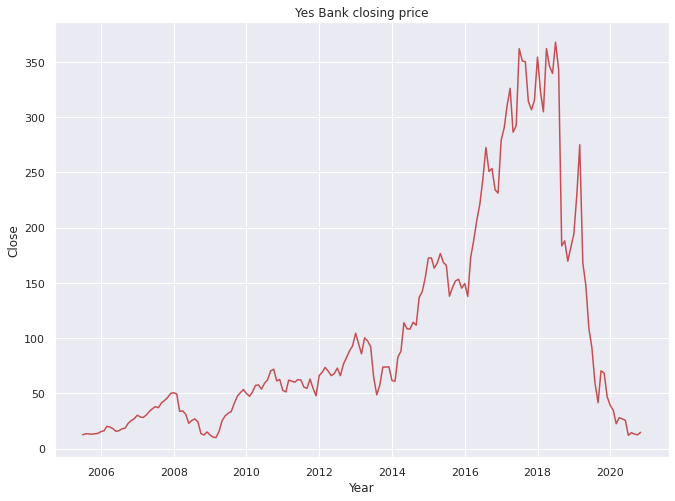

In [25]:
sns.set_theme(style="white")
sns.set(rc={'figure.figsize':(11,8)})
sns.lineplot(x="Date", y="Close",data=YBCPP,color='r').set(title='Yes Bank closing price',xlabel='Year')

Now, We can easly see in above plot the trend is increasing from 2009 to 2018 but after that the trend decreases. This is because of the fraud case of involving Rana Kapoor.

The main objective is to predict the stock’s closing price, I will take close price as dependent variable(Target variable)

# Dependent variable of close price of stock

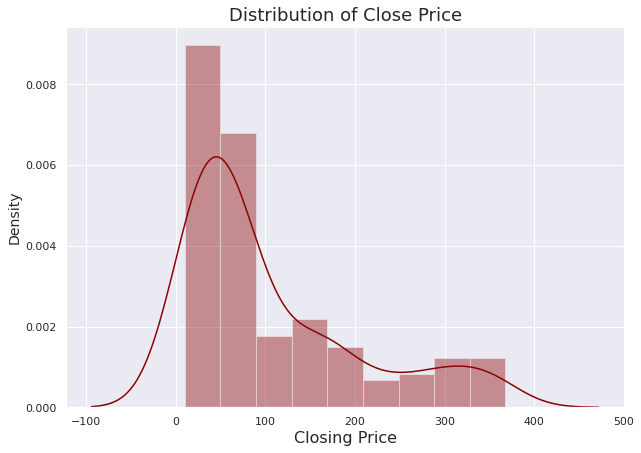

In [26]:
# depndent variable is 'Close'
# Normal Distribution
plt.figure(figsize = (10,7))
sns.distplot(YBCPP['Close'], color = 'darkred',kde=True)
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It is Right Skewed Distirbution

Applying log transformation to make it normal distribution.
The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

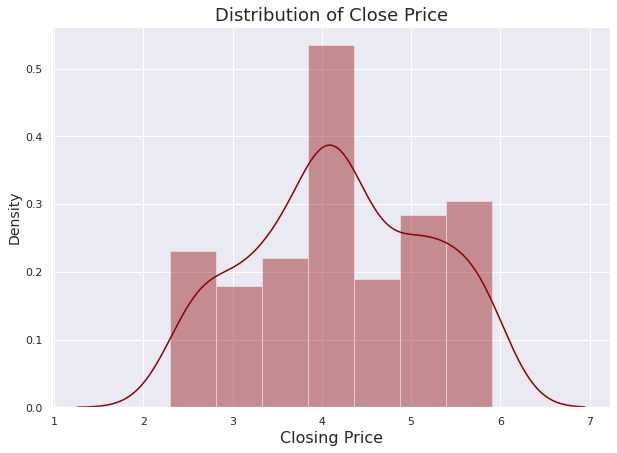

In [27]:
# Distribution plot of closing price For applying log transformation

plt.figure(figsize = (10,7))
sns.distplot(np.log(YBCPP['Close']), color = 'darkred')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

Now, distribution of closing price is more normal, after applying log transformation

# Independent Variables Open , High and Low price of stock
Plotting distribution of Open , High and Low numerical Features
[ ]


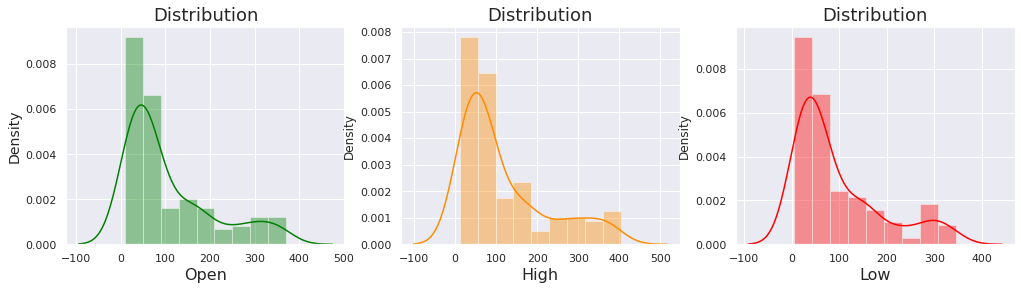

In [28]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(YBCPP['Open'], color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(YBCPP['High'], color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(YBCPP['Low'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)

plt.show()


It's looking like rightly skewed for all features.

# Again applying log transformation to make it normal distribution.
The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

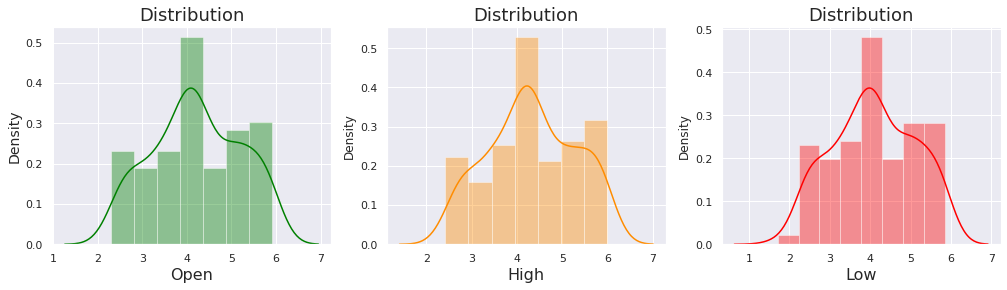

In [29]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(np.log(YBCPP['Open']), color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(np.log(YBCPP['High']), color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(np.log(YBCPP['Low']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)

plt.show()

Now, It looks like Normally Distributed of Open, High and Low Feature.